In [1]:
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import metrics
import string 
import spacy
import requests
import json

C:\Users\Hp\anaconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import tensorflow as tf

In [3]:
df = pd.read_csv('filtered_data_train.csv')
len(df.iloc[:].value_counts())

3063

In [4]:
df

,buggy_code,correct_code,problem_id,buggy_code_submission_id,correct_code_submission_id
0,"c;main(r){for(;scanf(""%d%d"",&r,&c),r;)puts(r&c...","c;main(r){for(;scanf(""%d%d"",&r,&c),r;)puts((r&...",p00657,s362273130,s011867637
1,"a[100],l,r,p,n;main(c){for(;l=scanf(""%d"",&r)*r...","a[100],l,r,p,n;main(c){for(;l=scanf(""%d"",&r)*r...",p00188,s446966487,s278308646
2,"#include <stdio.h>\nint main (void)\n{\nint a,...","#include <stdio.h>\nint main (void)\n{\nint a,...",p00161,s570559021,s490040394
3,#include <stdio.h>\n#include <math.h>\n\nchar ...,#include <stdio.h>\n#include <math.h>\n\nchar ...,p00044,s367988925,s836296672
4,#include <stdio.h>\nint main(void)\n{\n int a...,#include <stdio.h>\nint main(void)\n{\n int a...,p02398,s272396205,s183587626
...,...,...,...,...,...
3058,"Y,M,D;main(n){for(scanf(""%d"",&n);Y=n--;scanf(""...","main(Y,M,D){for(scanf(""%*d"");~scanf(""%d%d%d"",&...",p00760,s689276410,s312350405
3059,#include <stdio.h>\n\nint main(void){\n\n i...,#include <stdio.h>\n\nint main(void){\n\n i...,p02755,s606604490,s226498916
3060,"#include<stdio.h>\n \nvoid swap(int* a,int* b)...","#include<stdio.h>\n \nvoid swap(int* a,int* b)...",p02276,s948095782,s563397808
3061,"h;main(w){for(;~scanf(""%d%d"",&h,&w);puts(""""))f...","h;main(w){for(;scanf(""%d%d"",&h,&w),h|w;puts(""""...",p02494,s863615576,s020921668


In [5]:
from transformers import AutoTokenizer
s_tokenizer = AutoTokenizer.from_pretrained("shirshak-tokenizer")

In [6]:
s_tokenizer.add_special_tokens({'pad_token': '[PAD]'})

1

In [7]:
s_tokenizer

PreTrainedTokenizerFast(name_or_path='shirshak-tokenizer', vocab_size=11669, model_max_len=1024, is_fast=True, padding_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '[PAD]'})

In [8]:
example = """#include <stdio.h>
#include <stdlib.h>
int main() {
	int i,siz1,siz2;
	scanf(""%d"",siz1);
	scanf(""%d"",siz2);
	char ch1[siz1];
	char ch2[siz2];
	for(i=0;i<siz1;i++)
	ch1[i]= getchar();
	for(i=0;i<siz1;i++)
	putchar(ch1[i]);
	return 0;
}"""

In [9]:
tokens = s_tokenizer.tokenize(example)
tokens

['#',
 'include',
 'Ġ<',
 'stdio',
 '.',
 'h',
 '>',
 'Ċ',
 '#',
 'include',
 'Ġ<',
 'stdlib',
 '.',
 'h',
 '>',
 'Ċ',
 'int',
 'Ġmain',
 '()',
 'Ġ{',
 'Ċ',
 'ĉ',
 'int',
 'Ġi',
 ',',
 'siz',
 '1',
 ',',
 'siz',
 '2',
 ';',
 'Ċ',
 'ĉ',
 'scanf',
 '("',
 '"%',
 'd',
 '"",',
 'siz',
 '1',
 ');',
 'Ċ',
 'ĉ',
 'scanf',
 '("',
 '"%',
 'd',
 '"",',
 'siz',
 '2',
 ');',
 'Ċ',
 'ĉ',
 'char',
 'Ġch',
 '1',
 '[',
 'siz',
 '1',
 '];',
 'Ċ',
 'ĉ',
 'char',
 'Ġch',
 '2',
 '[',
 'siz',
 '2',
 '];',
 'Ċ',
 'ĉ',
 'for',
 '(',
 'i',
 '=',
 '0',
 ';',
 'i',
 '<',
 'siz',
 '1',
 ';',
 'i',
 '++)',
 'Ċ',
 'ĉ',
 'ch',
 '1',
 '[',
 'i',
 ']=',
 'Ġgetchar',
 '();',
 'Ċ',
 'ĉ',
 'for',
 '(',
 'i',
 '=',
 '0',
 ';',
 'i',
 '<',
 'siz',
 '1',
 ';',
 'i',
 '++)',
 'Ċ',
 'ĉ',
 'putchar',
 '(',
 'ch',
 '1',
 '[',
 'i',
 ']);',
 'Ċ',
 'ĉ',
 'return',
 'Ġ0',
 ';',
 'Ċ',
 '}']

In [10]:
print(len(tokens))

124


In [11]:
# def get_training_corpus():
#     for start_idx in range(0, len(df), 300):
#         samples = df[start_idx : start_idx + 300]
#         yield samples["correct_code"]

In [12]:
def get_training_corpus():
        return df['correct_code']

In [13]:
training_corpus = get_training_corpus()

In [14]:
type(training_corpus)

pandas.core.series.Series

In [15]:
t_c = training_corpus.to_list()

In [16]:
type(t_c)

list

In [17]:
t_c[768][1]

'i'

In [18]:
a = s_tokenizer.tokenize(t_c[1],truncation=False,padding=False)

In [19]:
a[7]

','

In [20]:
my_tokens = []

In [21]:
my_tokens.append([])

In [22]:
#my_tokens[0] = s_tokenizer.tokenize(t_c[0],truncation=True,padding=True)

In [23]:
#my_tokens[0][1]

In [24]:
#my_tokens.append(s_tokenizer.tokenize(t_c[1],truncation=True,padding=True))

In [25]:
#my_tokens[1][1]

In [26]:
for index,item in enumerate(t_c):
#     print(index)
#     print(item)
    my_tokens.append(s_tokenizer.tokenize(item,truncation=True,padding=True))
    




#my_tokens = s_tokenizer.tokenize(t_c,truncation=False,padding=False)

In [27]:
my_tokens[1][0]

'c'

In [28]:
m_token = []

In [29]:
for index,item in enumerate(t_c):
    m_token.append(s_tokenizer.tokenize(item,truncation=True,padding=True))

In [30]:
len(m_token)

3063

In [31]:
flat_list = [item for sublist in m_token for item in sublist]
flat_list

['c',
 ';',
 'main',
 '(',
 'r',
 '){',
 'for',
 '(;',
 'scanf',
 '("%',
 'd',
 '%',
 'd',
 '",&',
 'r',
 ',&',
 'c',
 '),',
 'r',
 ';)',
 'put',
 's',
 '((',
 'r',
 '&',
 'c',
 ')%',
 '2',
 '?',
 '"',
 'no',
 '":"',
 'yes',
 '");}',
 'a',
 '[',
 '100',
 '],',
 'l',
 ',',
 'r',
 ',',
 'p',
 ',',
 'n',
 ';',
 'main',
 '(',
 'c',
 '){',
 'for',
 '(;',
 'l',
 '=',
 'scanf',
 '("%',
 'd',
 '",&',
 'r',
 ')*',
 'r',
 ';',
 'printf',
 '("%',
 'd',
 '\\',
 'n',
 '",',
 'c',
 ')){',
 'for',
 '(;',
 'c',
 '=',
 'l',
 ';)',
 'scanf',
 '("%',
 'd',
 '",',
 'a',
 '+--',
 'l',
 ');',
 'for',
 '(',
 'scanf',
 '("%',
 'd',
 '",&',
 'n',
 ');',
 'l',
 '<',
 'r',
 '&&!',
 '++',
 'c',
 '|',
 'a',
 '[',
 'p',
 '=',
 'l',
 '+',
 'r',
 '>>',
 '1',
 ']-',
 'n',
 ';)',
 'a',
 '[',
 'p',
 ']<',
 'n',
 '?',
 'r',
 '=',
 'p',
 ':(',
 'l',
 '=',
 'p',
 '+',
 '1',
 ');}',
 'exit',
 '(',
 '0',
 ');}',
 '#',
 'include',
 'Ġ<',
 'stdio',
 '.',
 'h',
 '>',
 'Ċ',
 'int',
 'Ġmain',
 'Ġ(',
 'void',
 ')',
 'Ċ',
 '{',
 'Ċ

In [32]:
len(flat_list)

753717

In [33]:
import nltk
import seaborn as sns

In [34]:
sns.set_style('darkgrid')

In [35]:
f_list = set(flat_list)

In [36]:
len(f_list)

3290

In [37]:
nlp_words=nltk.FreqDist(flat_list)

In [56]:
nlp_words

FreqDist({'Ċ': 39192, ';': 32296, 'ĉ': 23117, '[': 21775, '(': 21464, 'i': 20802, ',': 17696, 'ĊĠ': 13670, 'ĊĠĠĠ': 12314, '?': 11740, ...})

In [38]:
nlp_words_df = pd.DataFrame(nlp_words.items(),columns=['word', 'count'])

In [39]:
a = nlp_words_df.iloc[2500:]
a

,word,count
2500,1000000001,5
2501,Ġblood,1
2502,blood,5
2503,%(,8
2504,Ġ=(,4
...,...,...
3285,ĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠ,1
3286,place,3
3287,Ġplace,3
3288,Fib,3


In [40]:
len(a)

790

In [61]:
xuhihhuu=[]

In [65]:
xuhihhuu.append([2])

In [66]:
for i in range(len(a)):
    xuhihhuu[0].append(nlp_words_df.iloc[2500+i]['word']) 
    xuhihhuu[1].append(nlp_words_df.iloc[2500+i]['count'])

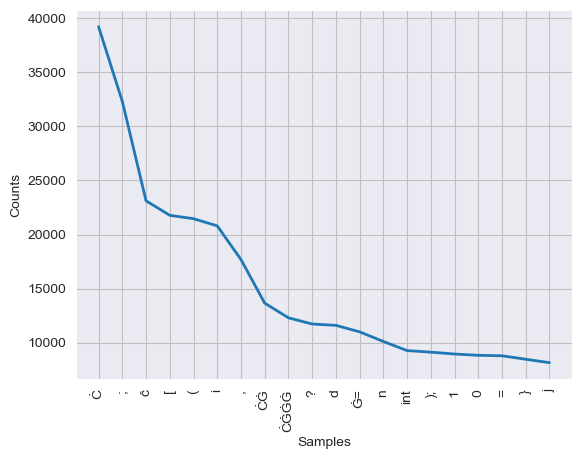

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [67]:
len(nlp_words)
nlp_words.plot(20)

In [68]:
type(nlp_words)

nltk.probability.FreqDist

In [70]:
xuhihhuu

[[2,
  '1000000001',
  'Ġblood',
  'blood',
  '%(',
  'Ġ=(',
  'compare',
  '])>',
  '[]=',
  'calloc',
  'space',
  'GHT',
  'From',
  'Height',
  'Count',
  'Ġassuming',
  'Ġonly',
  'Ġsingle',
  'Cre',
  'stor',
  'ĉĊĠĠĠĠĠĠĠ',
  'ĠPO',
  'ĊĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠ',
  'ĊĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠ',
  '120',
  'my',
  '("(%',
  '<%',
  'Ġ2016',
  'Ġfflush',
  'Ġoc',
  'oc',
  'ĠHe',
  'ĠMarks',
  'ĠMin',
  'Ġ;//',
  'Length',
  'Ġmember',
  ']){//',
  'Ġss',
  'mij',
  'ny',
  'Ġremove',
  'sy',
  'Ġsy',
  'Ġblock',
  'Ġdiv',
  'year',
  'Ġnm',
  'nm',
  'Ġ==(',
  ']||(',
  '"+',
  'Ġme',
  'ire',
  'change',
  'making',
  '=((',
  'cont',
  'Ġ78',
  '499',
  'ĠĠĉ',
  '199',
  '251',
  '401',
  '67',
  '54',
  '66',
  '77',
  'Ġsqu',
  '52',
  '504',
  '3276',
  '800',
  '94',
  '888',
  'ĠĊĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠ',
  'Ġreset',
  '--;}',
  'ility',
  'ĠThis',
  '.*/',
  'ĠConstraints',
  'ja',
  'cent',
  'matrix',
  'pre',
  'Ġdigits',
  'Ġro',
  'digits',
  "'<=",
  'Ap',
  'Ġf

In [71]:
xx = nltk.FreqDist(xuhihhuu)

TypeError: unhashable type: 'list'

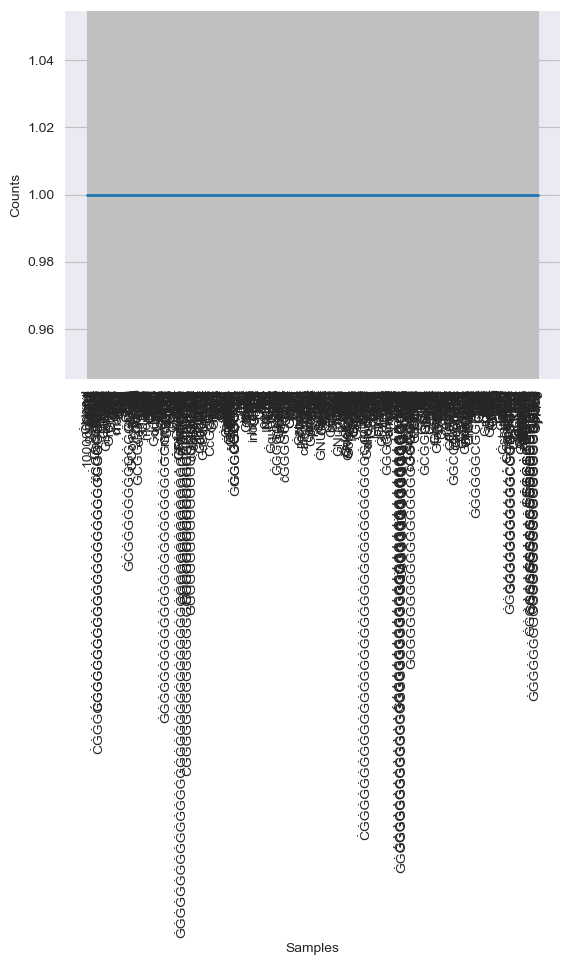

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [72]:
xx.plot()

In [50]:
xx

FreqDist({'1000000001': 1, 'Ġblood': 1, 'blood': 1, '%(': 1, 'Ġ=(': 1, 'compare': 1, '])>': 1, '[]=': 1, 'calloc': 1, 'space': 1, ...})

In [51]:
for token in m_token:
    intermediate = [x for x in my_tokens if x not in m_token]

In [52]:
intermediate     # intermediate consists of only unique words

[[]]

In [53]:
for token in intermediate:
    my_tokens.remove(token)      # hence 

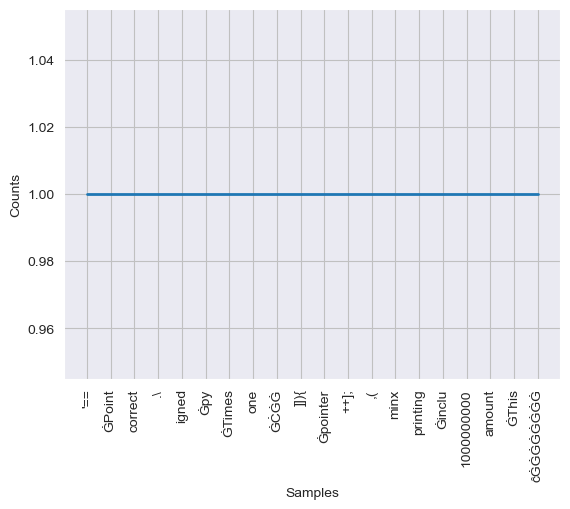

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [54]:
n_words=nltk.FreqDist(f_list)
n_words.plot(20)